In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn

In [4]:
%matplotlib inline

# Chapter 1

## Key Definitions

$\textbf{Definition}$ A Stochastic Process is a family of random variables $(X_t)_{t\in T}$ defined on a probability space $(\Omega,\mathcal{F},P)$

## Exercises

### Exercise 1.7
 $Z_t, t\in\mathbb{Z}$ independent normal random variables with mean $0$ and variance $\sigma^2$, $a,b,c$ constants.

a) $X_t = a+bZ_t+cZ_{t-1}$ is stationary. $E[X_t^2]<\infty$ since $Z_t$ have finite variance. By linearity $E[a+bZ_t+cZ_{t-1}]=a+bE[Z_t]+c[Z_{t-1}]=a$ is independent of $t$. For any lag $h\in\mathbb{Z}$ we get $$\gamma(X_t,X_{t+h})=E[(X_t-a)(X_{t+h}-a)]=E[(bZ_t+cZ_{t-1})(bZ_{t+h}+cZ_{t+h-1})]$$ which is independent of $t$ since the $Z_t$ are i.i.d.

b) $X_t = a+bZ_0$ is stationary since $X_t$ does not depend on $t$ and $Z_0$ has finite variance.

c) $X_t = Z_1\cos(ct)+Z_2\sin(ct)$ is stationary. $E[X_t^2]<\infty$ since $Z_1,Z_2$ have finite variance. By linearity $E[X_t]=0$ for all $t$. The autocovariance function at lag $s$,
$$E[X_tX_{t+s}]=E[Z_1^2\cos(ct)\cos(ct+cs)+Z_2^2\sin(ct)\sin(ct+cs)]=\\
\sigma^2(\cos(ct)^2\cos(cs)-\cos(ct)\sin(ct)\sin(cs)+\sin(ct)^2\cos(cs)+\sin(ct)\sin(cs)\cos(ct))=\sigma^2\cos(cs)$$ is independent of $t$.

d) $X_t = Z_0\cos(ct)$ is not stationary since the autocovariance function at lag $0$,
$$E[X_tX_t]=\cos(ct)^2\sigma^2$$
depends on $t$.

e) $X_t = Z_t\cos(ct)+Z_{t-1}\sin(ct)$ is not stationary since the autocovariance function at lag $1$ 
$$E[X_tX_{t-1}] = \cos(ct)\sin(ct)\sigma^2$$
depends on $t$.

f) $X_t = Z_tZ_{t-1}$ is stationary. ToDo: show finite variance. 
$$E[X_t] = E[Z_tZ_{t-1}] = 0$$ is independent of $t$. The autocovariance function at lag $1$ is
$$E[X_tX_{t-1}] = E[Z_tZ_{t-1}^2Z_{t-2}] = \sigma^2.$$ At lag $s>1$ it is $0$, thus it is independent of $t$.

In [5]:
#random variables to simulate a)-f)
Z = [np.random.normal() for k in range(100)]

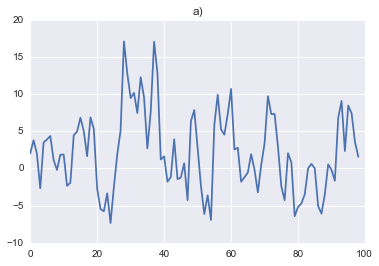

In [49]:
X = [2+3*z0+4*z1 for z0,z1 in zip(Z,Z[1:])]
plt.pyplot.plot(list(range(99)),X)
plt.pyplot.title('a)')

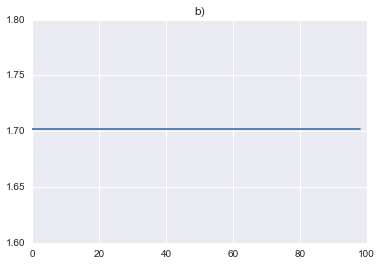

In [50]:
X = [2+3*Z[0] for z0,z1 in zip(Z,Z[1:])]
plt.pyplot.plot(list(range(99)),X)
plt.pyplot.title('b)')

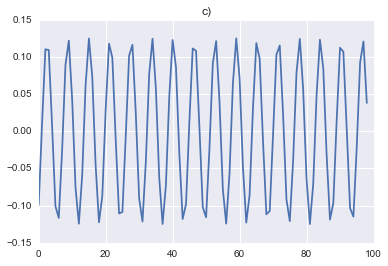

In [51]:
X = [Z[0]*np.cos(t)+Z[1]*np.sin(t) for z0,z1,t in zip(Z,Z[1:],range(100))]
plt.pyplot.plot(list(range(99)),X)
plt.pyplot.title('c)')

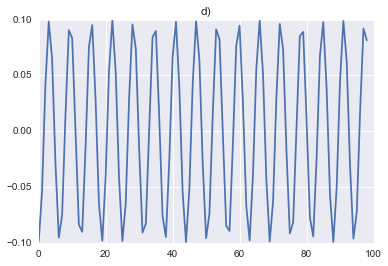

In [52]:
X = [Z[0]*np.cos(t) for z0,z1,t in zip(Z,Z[1:],range(100))]
plt.pyplot.plot(list(range(99)),X)
plt.pyplot.title('d)')

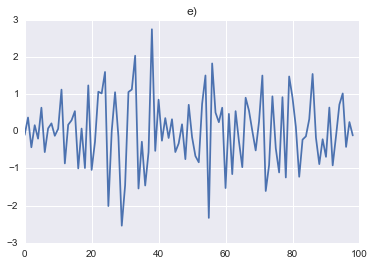

In [53]:
X = [z0*np.cos(t)+z1*np.sin(t) for z0,z1,t in zip(Z,Z[1:],range(100))]
plt.pyplot.plot(list(range(99)),X)
plt.pyplot.title('e)')

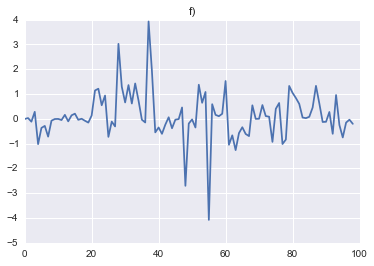

In [54]:
X = [z0*z1 for z0,z1 in zip(Z,Z[1:])]
plt.pyplot.plot(list(range(99)),X)
plt.pyplot.title('f)')

### Exercise 1.8

We need the following statement:

If $\{X_t\}$ is a stationary time series, then $Y_t = X_t + X_{t-s}$ is as well for any lag $s$.

Proof: $E[Y_t^2] = E[X_t^2] + 2E[X_tX_{t-s}] + E[X_{t-s}^2] < \infty$ since $\{X_t\}$ is stationary.
$E[Y_t] = E[X_t] + E[X_{t-s}]$ is independend of $t$ since $\{X_t\}$ is stationary.
$E[Y_tY_{t+h}] = E[X_tX_{t+h}] + E[X_tX_{t-s+h}] + E[X_{t-s}X_{t+h}] + E[X_{t-s}X_{t-s+h}]$ is independend of $t$.

a) $X_t = a+bt+s_t+Y_t$ with $\{Y_t\}$ stationary and $s_t$ seasonal with period $12$. Then
$$\nabla\nabla_{12}X_t = \nabla (12b+Y_t-Y_{t-12}) = Y_t - Y_{t-1} - Y_{t-12} + Y_{t-13}$$ is stationary by applying the statement above twice.

b) $X_t = (a+bt)s_t+Y_t$ with $\{Y_t\}$ stationary and $s_t$ seasonal with period $12$.
$$\nabla_{12}^2X_t = \nabla_{12}(12bs_t+Y_t-Y_{t-12}) = Y_t+Y_{t-24}$$ which is stationary by the statement above

In [23]:
def diff(data,lag=1):
    diff_data = []
    for k in range(len(data)-lag):
        diff_data.append(data[lag+k]-data[k])
    return diff_data

In [19]:
#variables to simulate a)
Y = [np.random.normal() for k in range(100)]
s = [2*np.cos(t*2*np.pi/12) for t in range(100)]
a = 2
b = 0.05
X = [a+b*t+s[t]+Y[t] for t in range(100)]

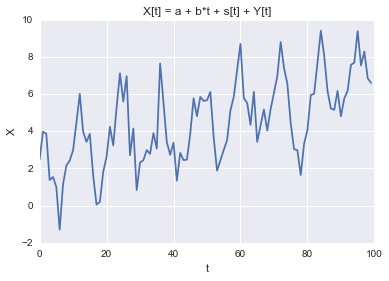

In [32]:
plt.pyplot.plot(list(range(100)),X)
plt.pyplot.xlabel('t')
plt.pyplot.ylabel('X')
plt.pyplot.title('X[t] = a + b*t + s[t] + Y[t]')

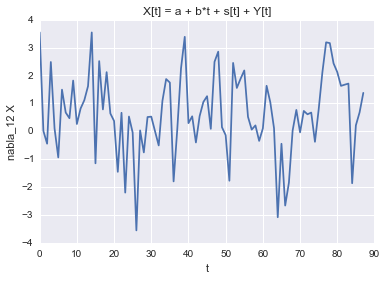

In [33]:
plt.pyplot.plot(list(range(88)),diff(X,lag=12))
plt.pyplot.xlabel('t')
plt.pyplot.ylabel('nabla_12 X')
plt.pyplot.title('X[t] = a + b*t + s[t] + Y[t]')

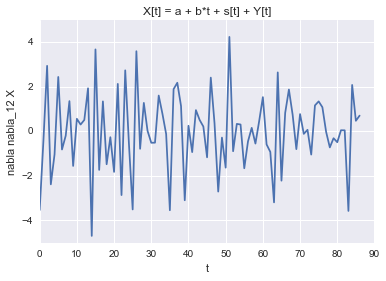

In [34]:
plt.pyplot.plot(list(range(87)),diff(diff(X,lag=12)))
plt.pyplot.xlabel('t')
plt.pyplot.ylabel('nabla nabla_12 X')
plt.pyplot.title('X[t] = a + b*t + s[t] + Y[t]')

In [40]:
#variables to simulate b)
Y = [np.random.normal() for k in range(100)]
s = [5*np.cos(t*2*np.pi/12) for t in range(100)]
a = 2
b = 0.05
X = [(a+b*t)*s[t]+Y[t] for t in range(100)]

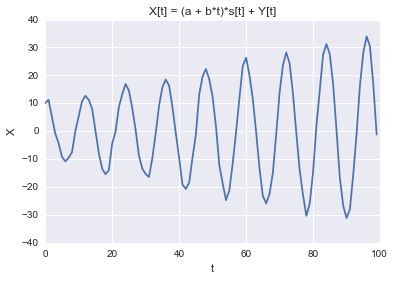

In [41]:
plt.pyplot.plot(list(range(100)),X)
plt.pyplot.xlabel('t')
plt.pyplot.ylabel('X')
plt.pyplot.title('X[t] = (a + b*t)*s[t] + Y[t]')

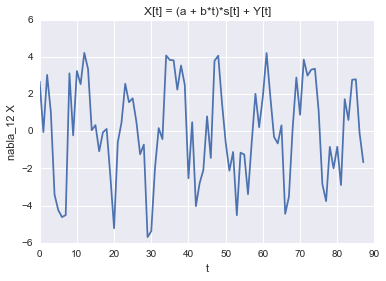

In [42]:
plt.pyplot.plot(list(range(88)),diff(X,lag=12))
plt.pyplot.xlabel('t')
plt.pyplot.ylabel('nabla_12 X')
plt.pyplot.title('X[t] = (a + b*t)*s[t] + Y[t]')

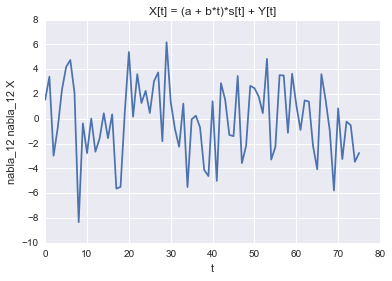

In [43]:
plt.pyplot.plot(list(range(76)),diff(diff(X,lag=12),lag=12))
plt.pyplot.xlabel('t')
plt.pyplot.ylabel('nabla_12 nabla_12 X')
plt.pyplot.title('X[t] = (a + b*t)*s[t] + Y[t]')

### Exercise 1.10

Let $X_t = a + bt + Y_t$ with $\{Y_t\}$ iid with mean $0$ and variance $\sigma^2$ and $a$ and $b$ constants. Define $$W_t = (2q+1)^{-1}\sum_{j=-q}^qX_{t+j}.$$
We get $$E[W_t]=(2q+1)^{-1}\sum_{j=-q}^qE[X_{t+j}]=(2q+1)^{-1}\sum_{j=-q}^q(a+b(t+j))=a+bt$$ and autocovariance function at lag $h$
$$E[(W_t-(a+bt))(W_{t+h}-(a+b(t+h)))] = 2(2q+1)^{-2}\sigma^2\max(0,q-\mid h\mid )$$
both are independent from $t$. The autocorrelation function is given by $$\rho (h)=q^{-1}\max(0,q-\mid h\mid)$$

### Exercise 1.11

Similar to proof of statement before exercise 1.8.

### Exercise 1.12

#### ToDo

### Exercise 1.13

Let $S_t=\mu +S_{t-1}+X_t$ be a random walk with constant drift $\mu$, start value $S_0=0$ and $X_t$ iid with mean $0$ and variance $\sigma^2$. The mean is $E[S_t] = E[\sum_{i=1}^t\mu+X_i]=t\mu$. The autocovariance at lag $h$ is given by 
$$E[(S_t-t\mu)(S_{t-h}-(t-h)\mu)] = E[\sum_{i=0}^tX_i\sum_{j=0}^{t-h}X_j]=(t-h)\sigma^2$$
Differencing gives us $\nabla S_t=\mu+X_t$ with mean $0$ and autocovariance function $\sigma^2$ at lag $0$ and $0$ else independend of $t$.

In [44]:
#simulate S
mu = 0.5
S = []
last_pos = 0
for k in range(100):
    pos = mu + last_pos + np.random.normal()
    S.append(pos)
    last_pos = pos

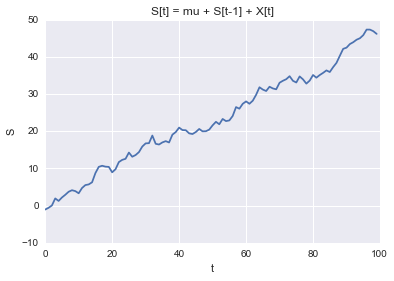

In [47]:
plt.pyplot.plot(list(range(100)),S)
plt.pyplot.xlabel('t')
plt.pyplot.ylabel('S')
plt.pyplot.title('S[t] = mu + S[t-1] + X[t]')

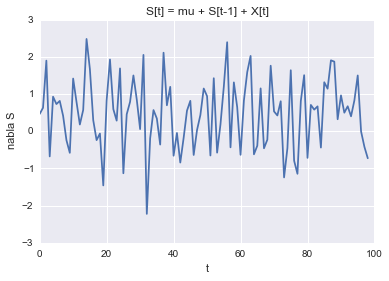

In [48]:
plt.pyplot.plot(list(range(99)),diff(S))
plt.pyplot.xlabel('t')
plt.pyplot.ylabel(' nabla S')
plt.pyplot.title('S[t] = mu + S[t-1] + X[t]')

### Exercise 1.14

 $X_t = a+bt$, $t=1\dots n$, $n\in\mathbb{N}$ then the sample mean $\bar{X}$ is $\frac{1}{n}\sum_{t=1}^na+bt=a+\frac{b(n+1)}{2}$. We get the autocovariance function at lag $h$: 
 #### ToDo

### Exercise 1.15

Proposition 1.6.1. Let $\mathbf{a}\in\mathbb{R}^m$, $B\in\mathbb{R}^{m\times n}$ be fixed and $\mathbf{X}=(X_1,\dots ,X_n)'$ be a random vector with $E\mid X_i\mid^2<\infty$ for all $i$. Then for $\mathbf{Y}=\mathbf{a}+B\mathbf{X}$ we get 
$$E\mathbf{Y}=\mathbf{a}+BE\mathbf{X}$$
and 
$$\Sigma_{\mathbf{Y}\mathbf{Y}}=B\Sigma_{\mathbf{X}\mathbf{X}}B'.$$

Proof: The first part follows directly from the linearity of the expected value. The second part is an easy calculation:
$$\Sigma_{\mathbf{Y}\mathbf{Y}}=E[(B\mathbf{X}-BE\mathbf{X})(B\mathbf{X}-BE\mathbf{X})']=BE[\mathbf{X}\mathbf{X}'-\mathbf{X}(E\mathbf{X})'-E\mathbf{X}\mathbf{X}'+E\mathbf{X}(E\mathbf{X})']B' = B\Sigma_{\mathbf{X}\mathbf{X}}B'.$$

# Chapter 2

## Key Definitions

$\textbf{Definition}$ A Hilbert Space is a complete vector space with inner product.

## Key Theorems

$\textbf{Projection Theorem}$ Let $\mathcal{M}$ be a closed subspace of a Hilbert Space $\mathcal{H}$ and $x\in\mathcal{H}$, then there exists a unique element $\hat x$ such that 
$$\|x-\hat x\| =\inf_{y\in\mathcal{M}}\|x-y\|$$

## Exercises

### Exercise 2.1

Parallelogram Law. Let $\mathcal{H}$ be a Hilbert Space, then 
$$\|x+y\|^2+\|x-y\|^2=2\|x\|^2+2\|y\|^2$$
for all $x$, $y\in\mathcal{H}$ 

Proof: $\|x+y\|^2+\|x-y\|^2=<x+y,x+y>-<x-y,x-y>=2<x,x>+2<x,y>+2<y,y>-2<y,x>=2\|x\|^2+2\|y\|^2$

### Exercise 2.2

Since $\mathit{L}^2(\Omega,\mathcal{S},P)$ is complete it is enought to show that $Y_n, n\in\mathbb{N}$ is a cauchy series. Since $X_t$ has mean $0$, $Y_t$ has mean $0$ as well. Let $m<n$ be natural numbers, then
$$\|Y_n-Y_m\|^2 = E[(Y_n-Y_m)^2] = E[\sum_{k=m}^n\sum_{r=m}^na_ka_rX_kX_r] = \sum_{k=m}^n\sum_{r=m}^na_ka_r\gamma(k-r)\leq\sum_{k=m}^\infty\sum_{r=m}^\infty a_ka_r\gamma(k-r)$$
The last term is finite by assumption and can be made arbitrarily small by choosing $m$ big enough, thus $Y_t$ is a cauchy series and therefore converges

### Exercise 2.3

#### ToDo

### Exercise 2.4

Let $\mathcal{M}$ be a closed subspace of a hilbert space $\mathcal{H}$, then $(\mathcal{M}^\bot)^{\bot}=\mathcal{M}$

Proof: For any $x\in\mathcal{M}$ and $y\in\mathcal{M}^\bot$ we have $<y,x>=0$ and therefore $x\in(\mathcal{M}^\bot)^\bot$.

#### ToDo other direction